<a href="https://colab.research.google.com/github/magistertesis2023/magistertesis2023/blob/main/Real_ExCNet_SIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this Notebook, I perform Explonatory Data Analysis and Data Transformation on the Skin Cancer Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns

In [ ]:
base_skin_dir = "/content/drive/MyDrive/ImagenExCNet/real/"
skin_df = pd.read_csv(os.path.join(base_skin_dir, 'metadata_windows_1000.csv')) # load in the data
skin_df.head()

isic_id attribution copyright_license  acquisition_day  age_approx  \
0  ISIC_0000000   Anonymous              CC-0              NaN        55.0   
1  ISIC_0000001   Anonymous              CC-0              NaN        30.0   
2  ISIC_0000002   Anonymous              CC-0              NaN        60.0   
3  ISIC_0000003   Anonymous              CC-0              NaN        30.0   
4  ISIC_0000004   Anonymous              CC-0              NaN        80.0   

  anatom_site_general benign_malignant  clin_size_long_diam_mm  \
0      anterior torso           benign                     NaN   
1      anterior torso           benign                     NaN   
2     upper extremity        malignant                     NaN   
3     upper extremity           benign                     NaN   
4     posterior torso        malignant                     NaN   

   dermoscopic_type diagnosis  ... mel_class  mel_mitotic_index  \
0               NaN     nevus  ...       NaN                NaN   
1               NaN     nevus  ...       NaN                NaN   
2               NaN  melanoma  ...       NaN                NaN   
3               NaN     nevus  ...       NaN                NaN   
4               NaN  melanoma  ...       NaN                NaN   

                                                ruta  mel_type  mel_ulcer  \
0  /content/drive/MyDrive/ImagenExCNet/real/ISIC_...       NaN      False   
1  /content/drive/MyDrive/ImagenExCNet/real/ISIC_...       NaN      False   
2  /content/drive/MyDrive/ImagenExCNet/real/ISIC_...       NaN      False   
3  /content/drive/MyDrive/ImagenExCNet/real/ISIC_...       NaN      False   
4  /content/drive/MyDrive/ImagenExCNet/real/ISIC_...       NaN      False   

   melanocytic nevus_type  patient_id  personal_hx_mm     sex  
0         True        NaN         NaN           False  female  
1         True        NaN         NaN           False  female  
2         True        NaN         NaN           False  female  
3         True        NaN         NaN           False    male  
4         True        NaN         NaN           False    male  

[5 rows x 24 columns]

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Oct 21 23:26:00 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    29W /  70W |    359MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#image_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
#                     for x in glob(os.path.join(base_skin_dir,  '*.txt'))}
#print("The output",imageid_path_dict)

In [ ]:
image_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.JPG'))
                     }

lesion_type_dict = {
'acrochordon'			:'acrochordon'			     ,
'actinic keratosis'		:'actinic keratosis'		     ,
'AIMP'				:'AIMP'				     ,
'angiofibroma or fibrous papule':'angiofibroma or fibrous papule'    ,
'angiokeratoma'			:'angiokeratoma'		     ,
'angioma'			:'angioma'			     ,
'atypical melanocytic proliferation':'atypical melanocytic proliferation',
'atypical spitz tumor'		:'atypical spitz tumor'		     ,
'basal cell carcinoma'		:'basal cell carcinoma'		     ,
'cafe-au-lait macule'		:'cafe-au-lait macule'		     ,
'clear cell acanthoma'		:'clear cell acanthoma'		     ,
'dermatofibroma'		:'dermatofibroma'		     ,
'lentigo NOS'			:'lentigo NOS'			     ,
'lentigo simplex'		:'lentigo simplex'		     ,
'lichenoid keratosis'		:'lichenoid keratosis'		     ,
'melanoma'			:'melanoma'			     ,
'melanoma metastasis'		:'melanoma metastasis'		     ,
'neurofibroma'			:'neurofibroma'			     ,
'nevus'				:'nevus'			     ,
'other'				:'other'			     ,
'pigmented benign keratosis'	:'pigmented benign keratosis'	     ,
'scar'				:'scar'				     ,
'seborrheic keratosis'		:'seborrheic keratosis'		     ,
'solar lentigo'			:'solar lentigo'		     ,
'squamous cell carcinoma'	:'squamous cell carcinoma'	     ,
'vascular lesion'		:'vascular lesion'		     ,
}



lesion_danger = {
'acrochordon'			:0,
'actinic keratosis'		:1,
'AIMP'				:0,
'angiofibroma or fibrous papule':0,
'angiokeratoma'			:0,
'angioma'			:0,
'atypical melanocytic proliferation':0,
'atypical spitz tumor'		:0,
'basal cell carcinoma'		:1,
'cafe-au-lait macule'		:0,
'clear cell acanthoma'		:0,
'dermatofibroma'		:0,
'lentigo NOS'			:0,
'lentigo simplex'		:0,
'lichenoid keratosis'		:0,
'melanoma'			:1,
'melanoma metastasis'		:1,
'neurofibroma'			:0,
'nevus'				:0,
'other'				:0,
'pigmented benign keratosis'	:0,
'scar'				:0,
'seborrheic keratosis'		:1,
'solar lentigo'			:0,
'squamous cell carcinoma'	:1,
'vascular lesion'		:0,
'verruca'			:0
}

In [ ]:
#skin_df["path"] = skin_df["isic_id"].map(image_path_dict.get) # map isic_id to the path of that image

In [ ]:
#skin_df["path"] = skin_df["isic_id"].map(imageid_path_dict.get) # map isic_id to the path of that image
skin_df["path"] = skin_df["ruta"] # map isic_id to the path of that image

In [ ]:
skin_df["cell_type"] = skin_df["diagnosis"].map(lesion_type_dict.get) # map diagnosis to type of lesion

In [ ]:
skin_df.head()

isic_id attribution copyright_license  acquisition_day  age_approx  \
0  ISIC_0000000   Anonymous              CC-0              NaN        55.0   
1  ISIC_0000001   Anonymous              CC-0              NaN        30.0   
2  ISIC_0000002   Anonymous              CC-0              NaN        60.0   
3  ISIC_0000003   Anonymous              CC-0              NaN        30.0   
4  ISIC_0000004   Anonymous              CC-0              NaN        80.0   

  anatom_site_general benign_malignant  clin_size_long_diam_mm  \
0      anterior torso           benign                     NaN   
1      anterior torso           benign                     NaN   
2     upper extremity        malignant                     NaN   
3     upper extremity           benign                     NaN   
4     posterior torso        malignant                     NaN   

   dermoscopic_type diagnosis  ...  \
0               NaN     nevus  ...   
1               NaN     nevus  ...   
2               NaN  melanoma  ...   
3               NaN     nevus  ...   
4               NaN  melanoma  ...   

                                                ruta  mel_type mel_ulcer  \
0  /content/drive/MyDrive/ImagenExCNet/real/ISIC_...       NaN     False   
1  /content/drive/MyDrive/ImagenExCNet/real/ISIC_...       NaN     False   
2  /content/drive/MyDrive/ImagenExCNet/real/ISIC_...       NaN     False   
3  /content/drive/MyDrive/ImagenExCNet/real/ISIC_...       NaN     False   
4  /content/drive/MyDrive/ImagenExCNet/real/ISIC_...       NaN     False   

   melanocytic  nevus_type  patient_id personal_hx_mm     sex  \
0         True         NaN         NaN          False  female   
1         True         NaN         NaN          False  female   
2         True         NaN         NaN          False  female   
3         True         NaN         NaN          False    male   
4         True         NaN         NaN          False    male   

                                                path  cell_type  
0  /content/drive/MyDrive/ImagenExCNet/real/ISIC_...      nevus  
1  /content/drive/MyDrive/ImagenExCNet/real/ISIC_...      nevus  
2  /content/drive/MyDrive/ImagenExCNet/real/ISIC_...   melanoma  
3  /content/drive/MyDrive/ImagenExCNet/real/ISIC_...      nevus  
4  /content/drive/MyDrive/ImagenExCNet/real/ISIC_...   melanoma  

[5 rows x 26 columns]

In [ ]:
skin_df["Malignant"] = skin_df["diagnosis"].map(lesion_danger.get)

In [ ]:
skin_df.head()

isic_id attribution copyright_license  acquisition_day  age_approx  \
0  ISIC_0000000   Anonymous              CC-0              NaN        55.0   
1  ISIC_0000001   Anonymous              CC-0              NaN        30.0   
2  ISIC_0000002   Anonymous              CC-0              NaN        60.0   
3  ISIC_0000003   Anonymous              CC-0              NaN        30.0   
4  ISIC_0000004   Anonymous              CC-0              NaN        80.0   

  anatom_site_general benign_malignant  clin_size_long_diam_mm  \
0      anterior torso           benign                     NaN   
1      anterior torso           benign                     NaN   
2     upper extremity        malignant                     NaN   
3     upper extremity           benign                     NaN   
4     posterior torso        malignant                     NaN   

   dermoscopic_type diagnosis  ... mel_type  mel_ulcer melanocytic  \
0               NaN     nevus  ...      NaN      False        True   
1               NaN     nevus  ...      NaN      False        True   
2               NaN  melanoma  ...      NaN      False        True   
3               NaN     nevus  ...      NaN      False        True   
4               NaN  melanoma  ...      NaN      False        True   

   nevus_type  patient_id  personal_hx_mm     sex  \
0         NaN         NaN           False  female   
1         NaN         NaN           False  female   
2         NaN         NaN           False  female   
3         NaN         NaN           False    male   
4         NaN         NaN           False    male   

                                                path  cell_type  Malignant  
0  /content/drive/MyDrive/ImagenExCNet/real/ISIC_...      nevus          0  
1  /content/drive/MyDrive/ImagenExCNet/real/ISIC_...      nevus          0  
2  /content/drive/MyDrive/ImagenExCNet/real/ISIC_...   melanoma          1  
3  /content/drive/MyDrive/ImagenExCNet/real/ISIC_...      nevus          0  
4  /content/drive/MyDrive/ImagenExCNet/real/ISIC_...   melanoma          1  

[5 rows x 27 columns]

In [ ]:
skin_df["cell_type_idx"] = pd.Categorical(skin_df["cell_type"]).codes # give each cell type a category id

In [ ]:
skin_df.sample(3)

isic_id attribution copyright_license  acquisition_day  age_approx  \
338  ISIC_0000339   Anonymous              CC-0              NaN        25.0   
535  ISIC_0000537   Anonymous              CC-0              NaN         NaN   
675  ISIC_0000677   Anonymous              CC-0              NaN        15.0   

    anatom_site_general benign_malignant  clin_size_long_diam_mm  \
338     upper extremity           benign                     NaN   
535                 NaN           benign                     NaN   
675                 NaN           benign                     NaN   

     dermoscopic_type diagnosis  ... mel_ulcer  melanocytic nevus_type  \
338               NaN     nevus  ...     False         True        NaN   
535               NaN     nevus  ...     False         True        NaN   
675               NaN     nevus  ...     False         True        NaN   

     patient_id  personal_hx_mm     sex  \
338         NaN           False  female   
535         NaN           False     NaN   
675         NaN           False    male   

                                                  path  cell_type  Malignant  \
338  /content/drive/MyDrive/ImagenExCNet/real/ISIC_...      nevus          0   
535  /content/drive/MyDrive/ImagenExCNet/real/ISIC_...      nevus          0   
675  /content/drive/MyDrive/ImagenExCNet/real/ISIC_...      nevus          0   

     cell_type_idx  
338              1  
535              1  
675              1  

[3 rows x 28 columns]

<Axes: title={'center': 'Benign vs Malignant'}>

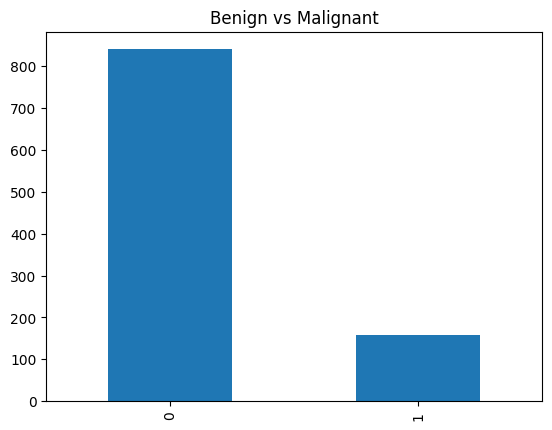

In [ ]:
skin_df["Malignant"].value_counts().plot(kind="bar", title="Benign vs Malignant")

Most cases in our dataset are benign.

<Axes: title={'center': 'Counts for each type of Lesions'}>

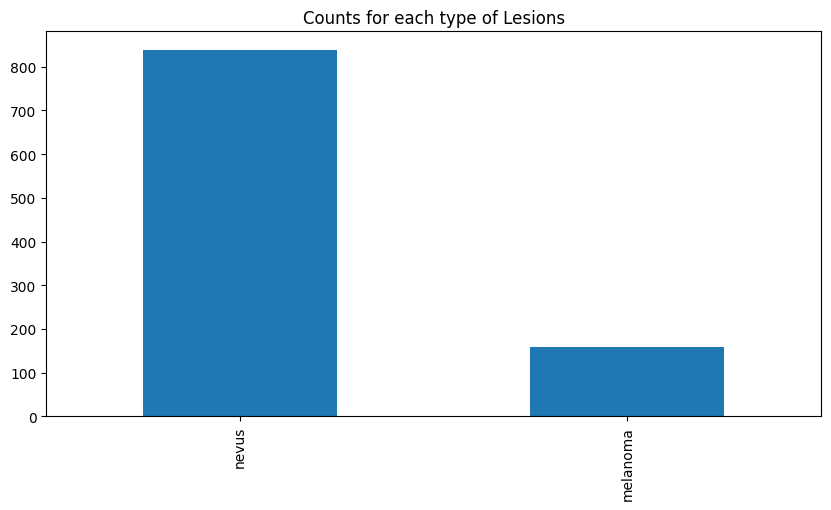

In [ ]:
fig, ax1 = plt.subplots(1,1,figsize=(10,5))
skin_df["cell_type"].value_counts().plot(kind="bar", ax=ax1, title="Counts for each type of Lesions") # plot a graph counting the number of each cell type

Nuestro conjunto de datos está sesgado hacia los nevos melanocíticos. El tipo de célula con el segundo mayor número de muestras es el notorio melanoma.

<Axes: title={'center': 'Location of Lesions'}>

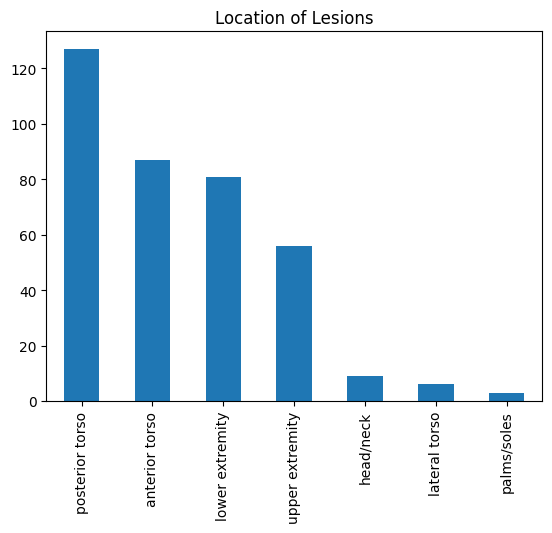

In [ ]:
# let's see where lesions are mostly located
skin_df["anatom_site_general"].value_counts().plot(kind='bar', title="Location of Lesions")

In [ ]:
#skin_df["dx_type"].value_counts().plot(kind='bar', title="Treatment received")

Descripción de cada dx_type:

histo: "Los diagnósticos histopatológicos de las lesiones extirpadas han sido realizados por dermatopatólogos especializados".

follow_up: "Si los nevos monitorizados mediante dermatoscopia digital no mostraron ningún cambio durante 3 visitas de seguimiento o 1,5 años, aceptamos esto como evidencia de benignidad biológica. Sólo los nevos, pero ningún otro diagnóstico benigno, fueron etiquetados con este tipo de verdad fundamental porque Los dermatólogos generalmente no controlan los dermatofibromas, las queratosis seborreicas o las lesiones vasculares".

consenso: "Para los casos benignos típicos sin histopatología o seguimiento, proporcionamos una calificación de consenso de expertos de los autores PT y HK. Aplicamos la etiqueta de consenso sólo si ambos autores dieron de forma independiente el mismo diagnóstico benigno inequívoco. Las lesiones con este tipo de verdad sobre el terreno fueron "Por lo general, se fotografiaba por razones educativas y no necesitaba más seguimiento ni biopsia para confirmarlo".

confocal: "La microscopía confocal de reflectancia es una técnica de imágenes in vivo con una resolución a nivel casi celular, y mediante este método se verificaron algunas queratosis faciales benignas".


Veamos algunas características de nuestros pacientes.

<Axes: >

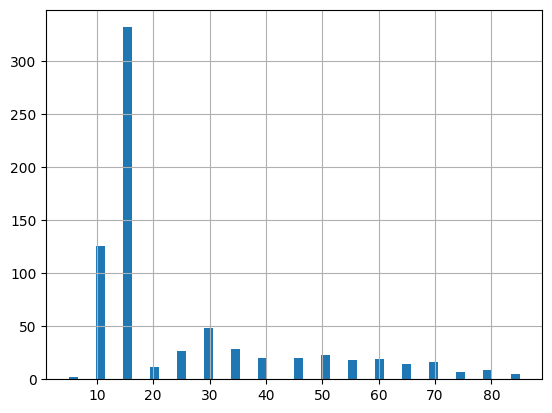

In [ ]:
skin_df["age_approx"].hist(bins=50)

<Axes: >

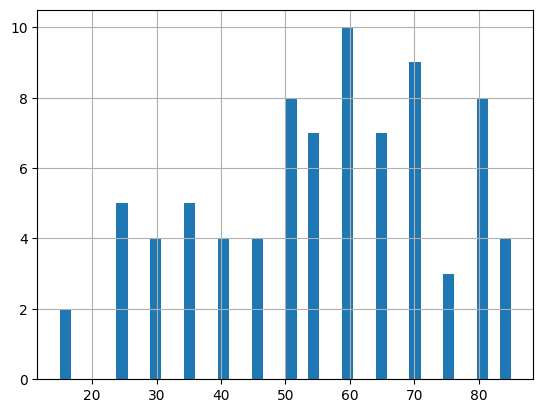

In [ ]:
skin_df[skin_df["Malignant"] == 1]["age_approx"].hist(bins=40)

Podemos ver que la mayoría de los pacientes tienen más de 30 años. Pero en los casos malignos, la mayoría de los pacientes tienen 50 años o más, y los pacientes de 70 años son los más presentes.

<Axes: title={'center': 'Male vs Female'}>

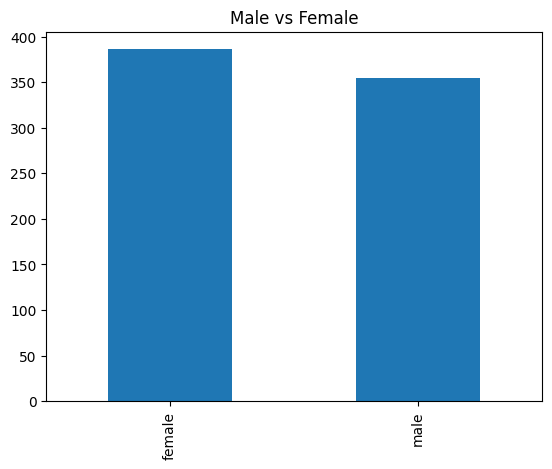

In [ ]:
skin_df["sex"].value_counts().plot(kind="bar", title="Male vs Female")

<Axes: title={'center': 'Male vs Female. Malignant Cases'}>

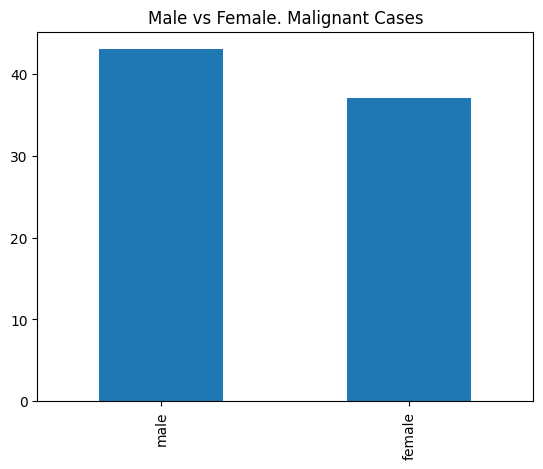

In [ ]:
skin_df[skin_df["Malignant"] == 1]["sex"].value_counts().plot(kind="bar", title="Male vs Female. Malignant Cases")

Tenemos más pacientes masculinos que femeninos tanto en población general como en casos malignos. Hasta ahora aún no hemos mirado nuestra imagen. Así que ahora cambiemos nuestro enfoque en cómo se ven las lesiones en nuestro conjunto de datos.

In [ ]:
from skimage.io import imread

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Oct 21 23:26:02 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    30W /  70W |    359MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
#skin_df["image"] = skin_df["path"].map(imread) # read the image to array values

skin_df["image"] = skin_df["path"].map(imread) # read the image to array values



In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Oct 21 23:26:48 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0    31W /  70W |    359MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
skin_df.iloc[0]["image"] # here is a sample

array([[[252, 255, 253],
        [230, 239, 238],
        [236, 249, 255],
        ...,
        [232, 255, 255],
        [229, 247, 255],
        [245, 255, 255]],

       [[230, 234, 235],
        [178, 186, 189],
        [167, 181, 190],
        ...,
        [174, 204, 228],
        [182, 201, 216],
        [226, 243, 253]],

       [[242, 246, 255],
        [173, 181, 192],
        [152, 165, 181],
        ...,
        [158, 192, 220],
        [168, 193, 213],
        [226, 248, 255]],

       ...,

       [[235, 251, 255],
        [181, 197, 222],
        [172, 188, 221],
        ...,
        [192, 223, 241],
        [192, 216, 228],
        [234, 254, 255]],

       [[228, 238, 247],
        [186, 196, 206],
        [184, 195, 213],
        ...,
        [201, 227, 240],
        [197, 216, 223],
        [235, 250, 255]],

       [[252, 255, 246],
        [235, 240, 233],
        [246, 252, 252],
        ...,
        [234, 254, 255],
        [224, 238, 241],
        [248, 255, 255]]

In [ ]:
# let's see what is the shape of each value in the image column
skin_df["image"].map(lambda x: x.shape).value_counts()

(224, 224, 3)      499
(576, 767, 3)       80
(2304, 3072, 3)     64
(1536, 2048, 3)     64
(1129, 1504, 3)     52
                  ... 
(703, 1062, 3)       1
(704, 1057, 3)       1
(543, 722, 3)        1
(1036, 1502, 3)      1
(1026, 1502, 3)      1
Name: image, Length: 86, dtype: int64

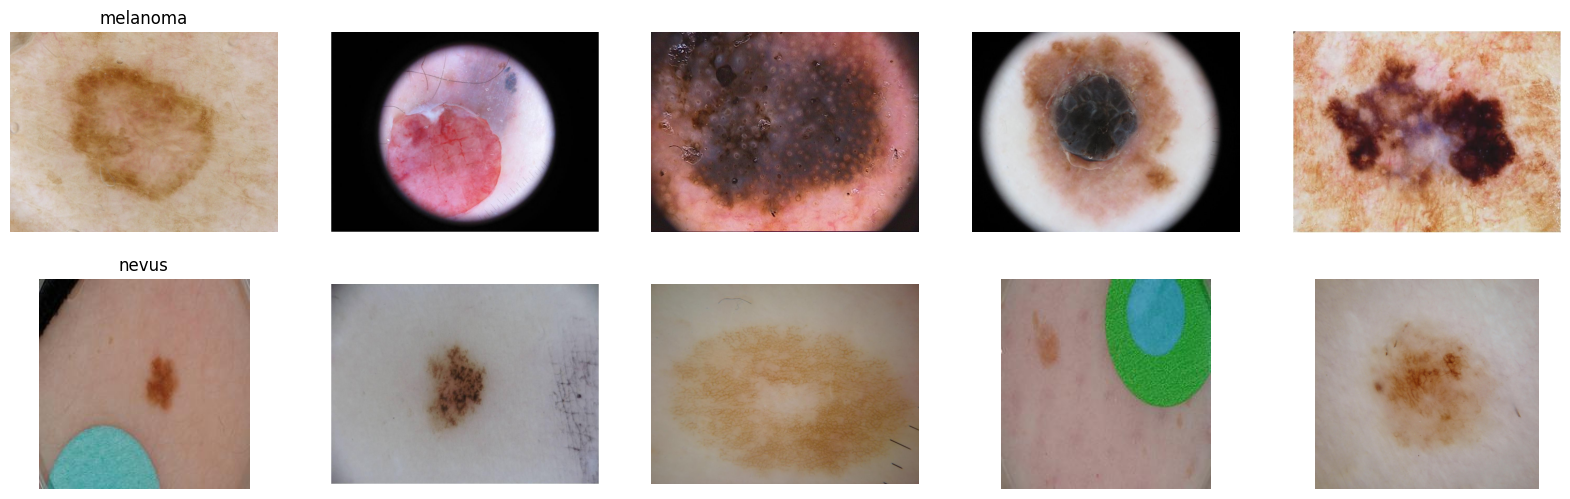

In [ ]:
# let's have a look at the image data

n_samples = 5 # choose 5 samples for each cell type
fig, m_axs = plt.subplots(2, n_samples, figsize=(4*n_samples, 3 * 2))

for n_axs, (type_name, type_rows) in zip(m_axs, skin_df.sort_values(["cell_type"]).groupby("cell_type")):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=0,replace=True).iterrows()):
        c_ax.imshow(c_row["image"])
        c_ax.axis("off")
fig.savefig("category_samples.png", dpi=100)

Según estas imágenes, todavía es muy difícil para los no expertos saberlo.
cual es cual.

## Get Average Color Information

Aquí obtenemos y normalizamos toda la información del canal de color.

La forma de la matriz de imágenes es (450, 600, 3). 3 son los 3 canales: Rojo, Azul y Verde! Tomando la media a través del eje = (0,1) se obtiene la media para cada 3 canales.

In [ ]:
# create a pandas dataframe to store mean value of Red, Blue and Green for each picture
rgb_info_df = skin_df.apply(lambda x: pd.Series({'{}_mean'.format(k): v for k, v
                                                 in zip(["Red", "Blue", "Green"],
                                                        np.mean(x["image"], (0, 1)))}), 1)


gray_col_vec = rgb_info_df.apply(lambda x: np.mean(x), 1) # take the mean value across columns of rgb_info_df
for c_col in rgb_info_df.columns:
    rgb_info_df[c_col] = rgb_info_df[c_col]/gray_col_vec
rgb_info_df["Gray_mean"] = gray_col_vec
rgb_info_df.sample(3)

Red_mean  Blue_mean  Green_mean   Gray_mean
181  1.160664   0.926969    0.912367  202.369948
764  1.148783   0.988360    0.862857  141.948315
99   1.163784   0.957819    0.878397  163.034314

In [ ]:
for c_col in rgb_info_df.columns:
    skin_df[c_col] = rgb_info_df[c_col].values

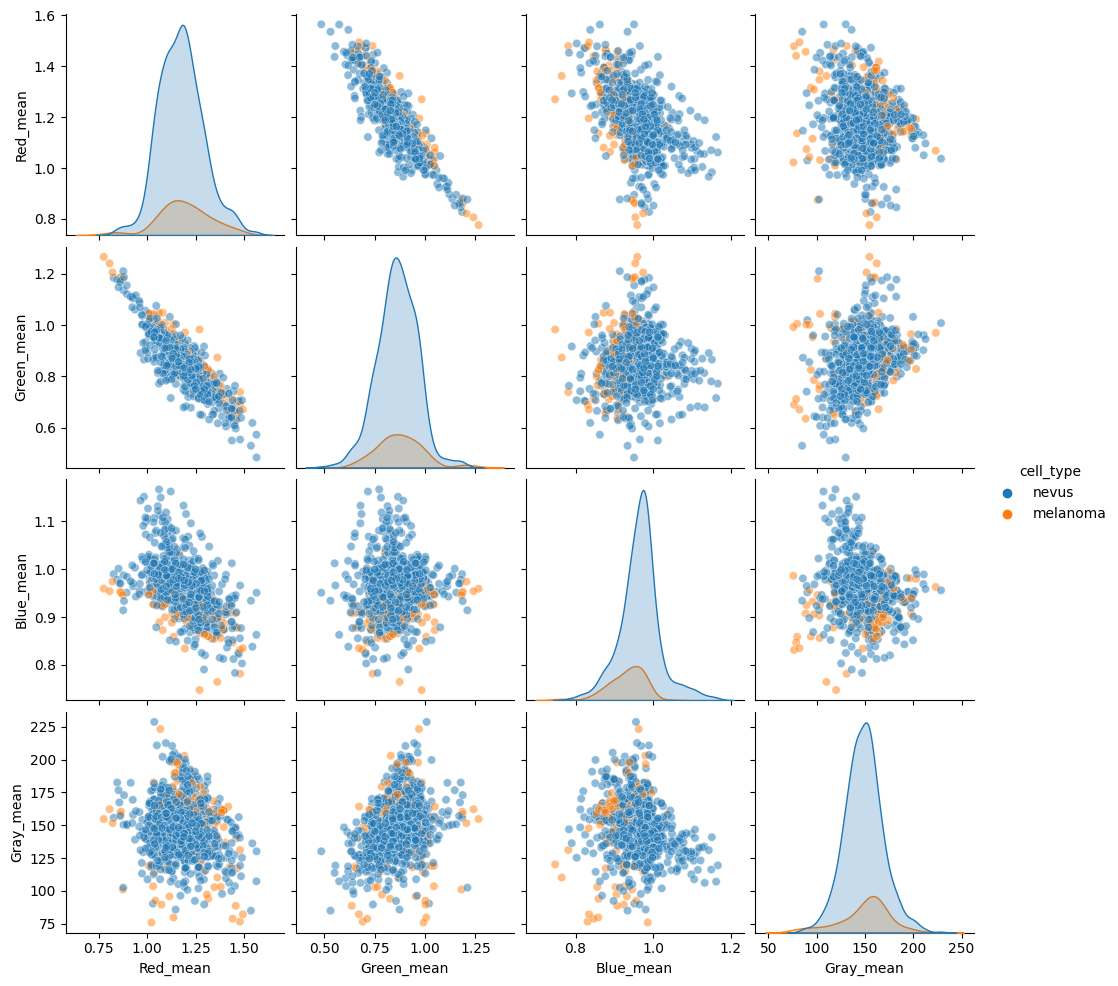

In [ ]:
# let's draw a plot showing the distribution of different cell types over colors!
sns.pairplot(skin_df[["Red_mean", "Green_mean", "Blue_mean", "Gray_mean", "cell_type"]],
             hue="cell_type", plot_kws = {"alpha": 0.5})

## Cambios en la apariencia del tipo de celda a medida que cambian los valores en el canal de color

En esta sección, estoy haciendo un análisis de cómo se ve cada tipo de celda cuando cambian los valores de cada canal de color. P.ej. Las primeras 5 imágenes demuestran cómo la apariencia de las queratosis actínicas celulares cambia a medida que los valores en el canal rojo aumentan.

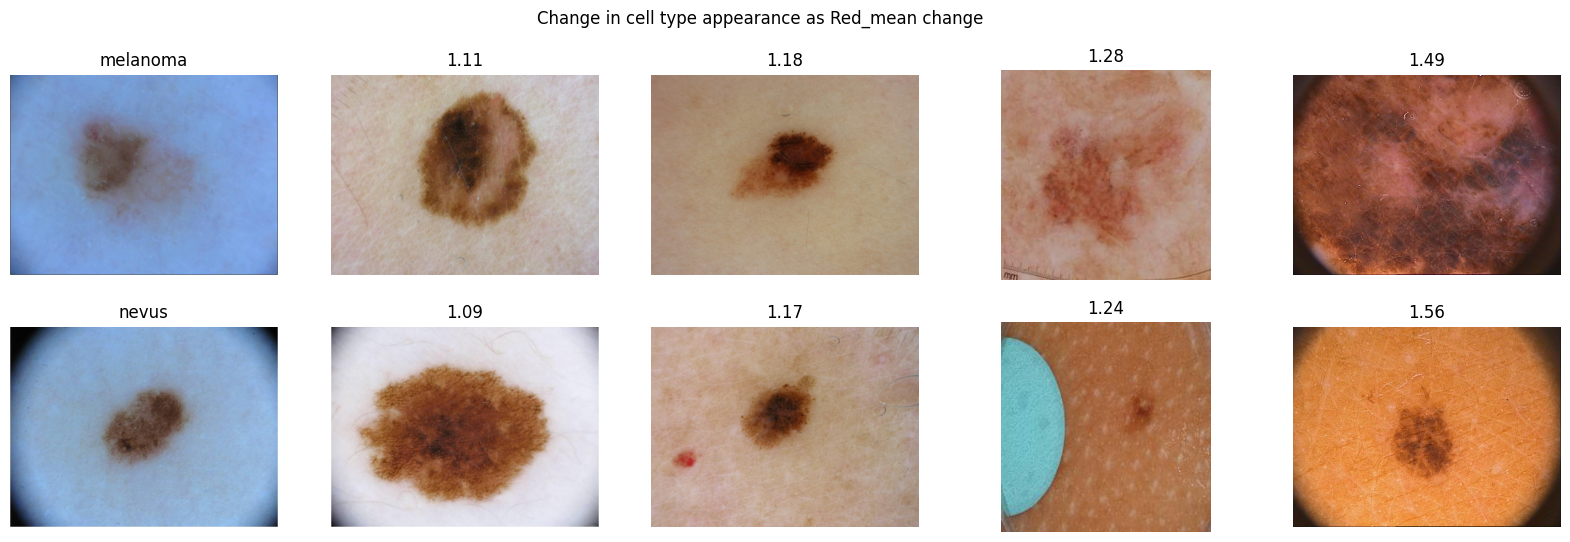

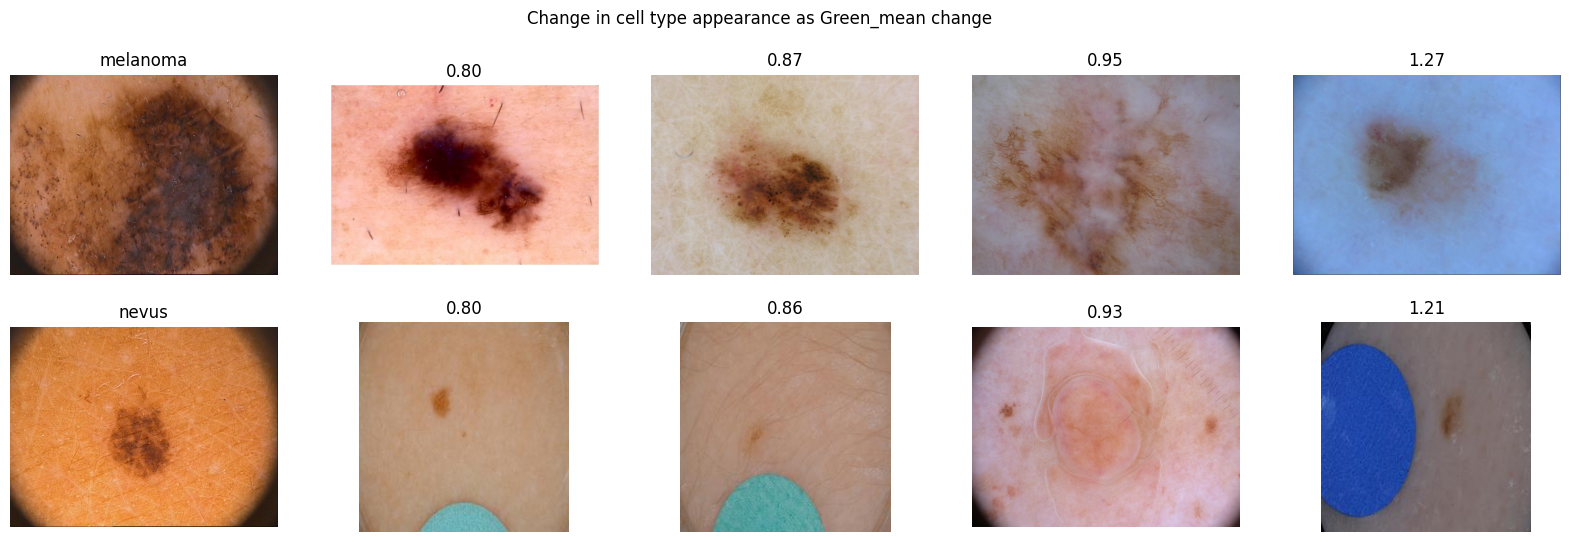

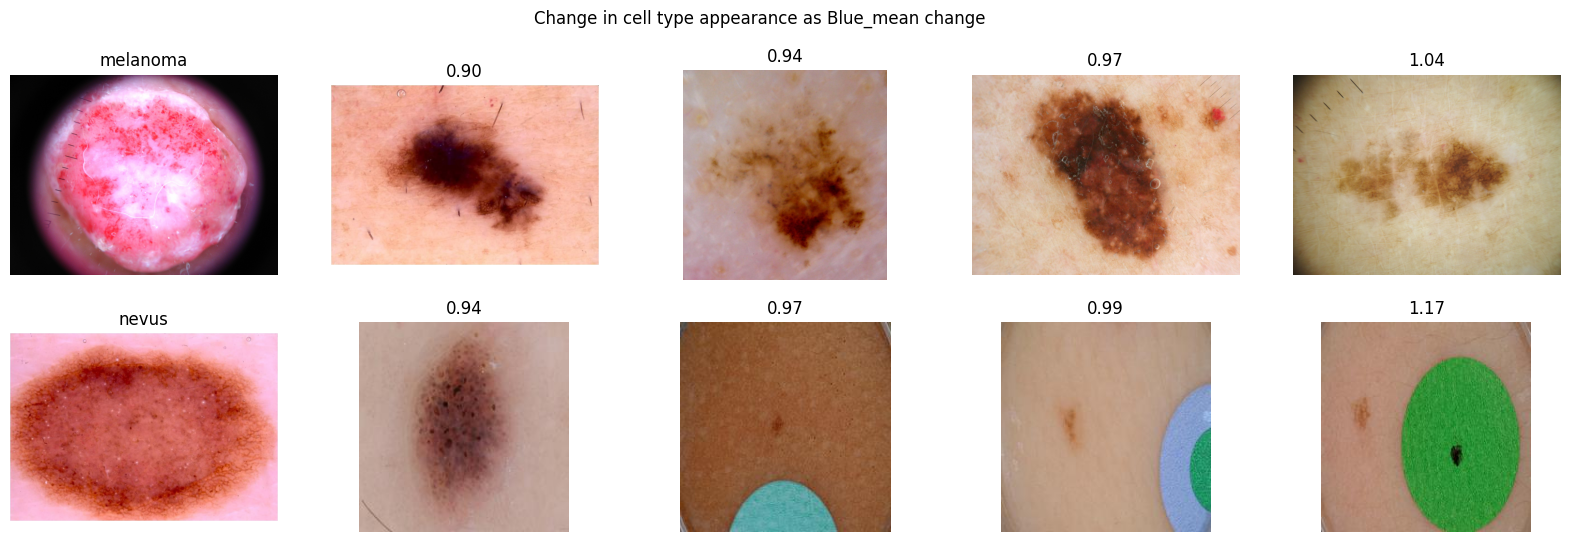

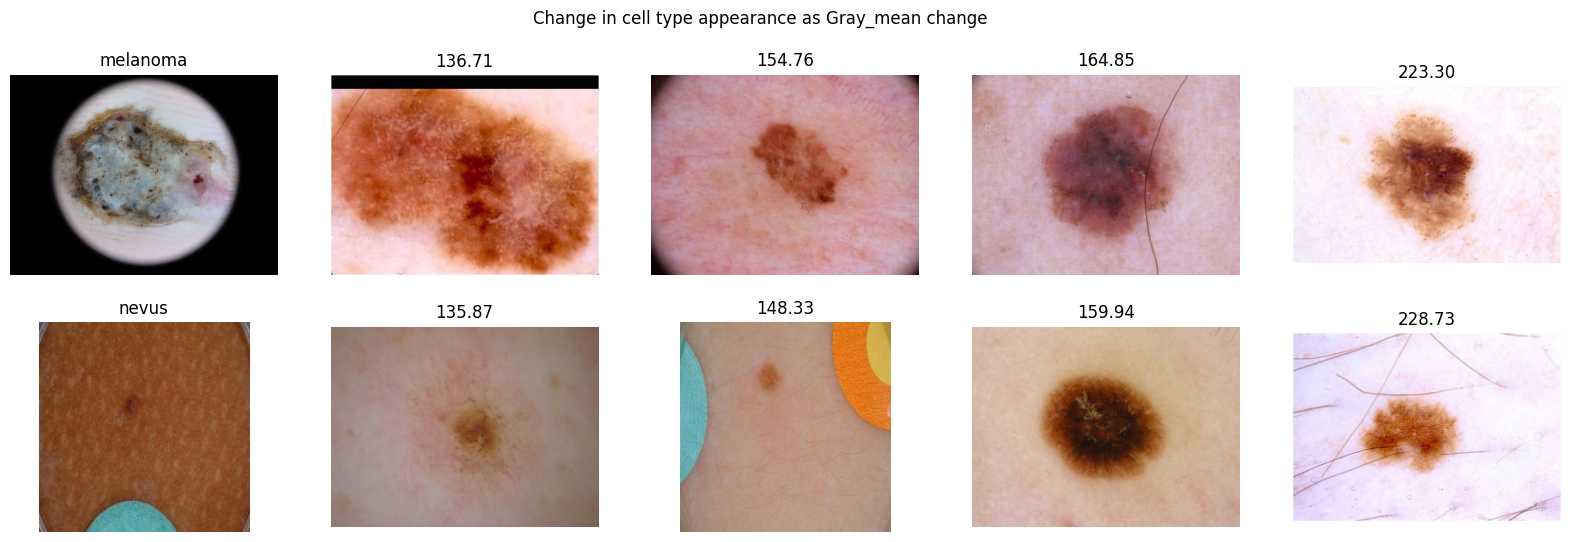

In [ ]:
n_samples = 5
for sample_col in ["Red_mean", "Green_mean", "Blue_mean", "Gray_mean"]:
    fig, m_axs = plt.subplots(2, n_samples, figsize=(4 * n_samples, 3 * 2))
    fig.suptitle(f"Change in cell type appearance as {sample_col} change")
    # define a function to get back a dataframe with 5 samples sorted by color channel values
    def take_n_space(in_rows, val_col, n):
        s_rows = in_rows.sort_values([val_col])
        s_idx = np.linspace(0, s_rows.shape[0] - 1, n, dtype=int)
        return s_rows.iloc[s_idx]

    for n_axs, (type_name, type_rows) in zip(m_axs, skin_df.sort_values(["cell_type"]).groupby("cell_type")):
        for c_ax, (_, c_row) in zip(n_axs, take_n_space(type_rows, sample_col, n_samples).iterrows()):
            c_ax.imshow(c_row["image"])
            c_ax.axis("off")
            c_ax.set_title('{:2.2f}'.format(c_row[sample_col]))
        n_axs[0].set_title(type_name)
    fig.savefig("{}_samples.png".format(sample_col), dpi=300)